# 


messing up the data

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [2]:
import pandas as pd
import numpy as np

# Load the original clean dataset
df = pd.read_csv(r"C:\Users\akash\Downloads\Sleep_health_and_lifestyle_dataset.csv")

# Introduce missing values in specific columns for 50 rows
np.random.seed(42)
missing_indices = np.random.choice(df.index, 50, replace=False)
df.loc[missing_indices, 'Physical Activity Level'] = np.nan
df.loc[missing_indices, 'Sleep Duration'] = np.nan
df.loc[missing_indices, 'Stress Level'] = np.nan
df.loc[missing_indices, 'Blood Pressure'] = np.nan

# Introduce outliers in 'Heart Rate', 'Physical Activity Level', and 'Sleep Duration'
outlier_indices = np.random.choice(df.index, 50, replace=False)
df.loc[outlier_indices, 'Heart Rate'] = df['Heart Rate'] * 10
df.loc[outlier_indices, 'Physical Activity Level'] = df['Physical Activity Level'] * 10
df.loc[outlier_indices, 'Sleep Duration'] = df['Sleep Duration'] * 10

# Add duplicate rows
duplicate_indices = np.random.choice(df.index, 50, replace=False)
duplicates = df.loc[duplicate_indices]
df = pd.concat([df, duplicates], ignore_index=True)


# Save the messy dataset
df.to_csv(r"C:\Users\akash\Downloads\messy_sleep_health_and_lifestyle_dataset.csv", index=False)


In [3]:
print(df.head(50))

    Person ID  Gender  Age            Occupation  Sleep Duration  \
0           1    Male   27     Software Engineer             NaN   
1           2    Male   28                Doctor            62.0   
2           3    Male   28                Doctor             6.2   
3           4    Male   28  Sales Representative             5.9   
4           5    Male   28  Sales Representative             5.9   
5           6    Male   28     Software Engineer             NaN   
6           7    Male   29               Teacher             6.3   
7           8    Male   29                Doctor             7.8   
8           9    Male   29                Doctor             7.8   
9          10    Male   29                Doctor             NaN   
10         11    Male   29                Doctor            61.0   
11         12    Male   29                Doctor             7.8   
12         13    Male   29                Doctor             6.1   
13         14    Male   29                Doctor

# Data pre processing 

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the messy dataset
df = pd.read_csv(r"C:\Users\akash\Downloads\messy_sleep_health_and_lifestyle_dataset.csv")

# 1. Remove rows with any missing values
df.dropna(inplace=True)

# 2. Remove duplicate rows
df.drop_duplicates(inplace=True)

# 3. Handle outliers using the IQR method

def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to relevant numerical columns
numerical_columns = ['Sleep Duration', 'Heart Rate', 'Physical Activity Level']
for col in numerical_columns:
    cap_outliers(col)

# 4. Convert categorical to numerical
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['Gender', 'Occupation', 'Quality of Sleep', 'BMI Category', 'Sleep Disorder']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Save the preprocessed dataset
df.to_csv(r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset.csv", index=False)


# Linear Regression

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
df = pd.read_csv(r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset.csv")


In [20]:
# Assuming the Blood Pressure column is named 'Blood Pressure'
# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert these new columns to numeric types
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

# Now, drop the original 'Blood Pressure' column
df = df.drop(columns=['Blood Pressure'])


In [21]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = model.predict(X_test)


In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.22135603476383992
R^2 Score: 0.41548172070173517


# Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# Initialize the model
model = LinearRegression()

# Define the scorer as negative mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 10-Fold Cross-Validation
k = 10
cv_scores = cross_val_score(model, X, y, cv=k, scoring=mse_scorer)

# Convert the negative MSE to positive MSE
cv_scores = -cv_scores

# Calculate the average MSE across all folds
mean_mse = cv_scores.mean()
std_mse = cv_scores.std()

print(f"Mean MSE over {k} folds: {mean_mse}")
print(f"Standard Deviation of MSE over {k} folds: {std_mse}")


Mean MSE over 10 folds: 0.34308035581821616
Standard Deviation of MSE over 10 folds: 0.09625840873084023


In [3]:
import pandas as pd

# Load your preprocessed dataset
df = pd.read_csv(r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset.csv")


In [4]:
# Split the 'Blood Pressure' column into 'Systolic_BP' and 'Diastolic_BP'
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric values
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')

# Drop the original 'Blood Pressure' column if not needed
df = df.drop(columns=['Blood Pressure'])


In [5]:
# Save the modified DataFrame to a new CSV file
output_path = r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset_split_BP.csv"
df.to_csv(output_path, index=False)


# Logistic regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 
df = pd.read_csv(r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset_split_BP.csv")

# Separate features and target variable
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Split the data into training and testing sets
/
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model with increased max_iter and alternative solver
model = LogisticRegression(max_iter=2000, solver='saga')  # You can also try 'sag' or 'liblinear'
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8923076923076924
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.95      0.93      0.94        40
           2       0.92      0.80      0.86        15

    accuracy                           0.89        65
   macro avg       0.85      0.88      0.86        65
weighted avg       0.90      0.89      0.89        65



# principal component analysis

   Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0          2       1   28           1           10.35                 2   
1          3       1   28           1            6.20                 2   
2          4       1   28           6            5.90                 0   
3          5       1   28           6            5.90                 0   
4          7       1   29          10            6.30                 2   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                    157.5           8.0             0        85.5   
1                     60.0           8.0             0        75.0   
2                     30.0           8.0             2        85.0   
3                     30.0           8.0             2        85.0   
4                     40.0           7.0             2        82.0   

   Daily Steps  Sleep Disorder  Systolic_BP  Diastolic_BP  
0        10000               1          125            80  
1       

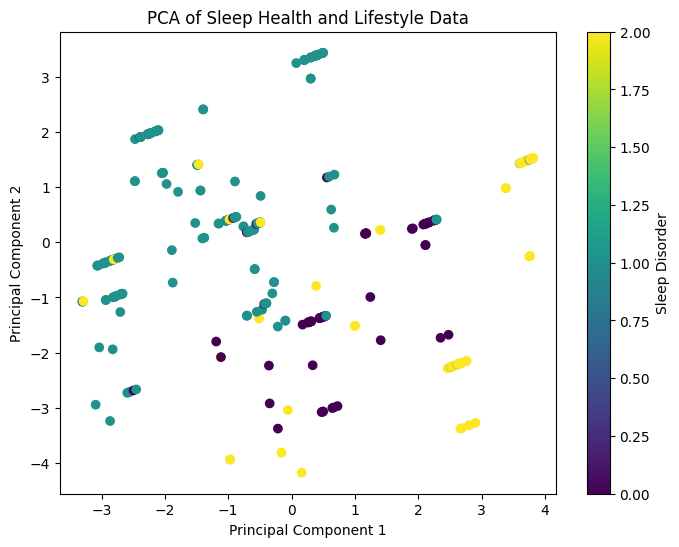

In [3]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your preprocessed dataset
df = pd.read_csv(r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset_split_BP.csv")

# Check the first few rows of the dataset
print(df.head())
# Separate features (X) and target (y)
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA and fit the model
pca = PCA(n_components=2)  # Let's reduce to 2 components for visualization purposes
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio to understand how much variance is captured by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sleep Health and Lifestyle Data')
plt.colorbar(label='Sleep Disorder')
plt.show()


In [4]:
# Create a DataFrame with the PCA components and save it
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Sleep Disorder'] = y.values
pca_df.to_csv(r"C:\Users\akash\Downloads\pca_transformed_sleep_health_and_lifestyle_dataset.csv", index=False)


# Naive Bayes Classification

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your preprocessed dataset
df = pd.read_csv(r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset_split_BP.csv")

# Split the data into features (X) and target (y)
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.97      0.95      0.96        40
           2       0.92      0.80      0.86        15

    accuracy                           0.91        65
   macro avg       0.86      0.88      0.87        65
weighted avg       0.92      0.91      0.91        65

Confusion Matrix:
[[ 9  1  0]
 [ 1 38  1]
 [ 3  0 12]]


# Support Vector Machine

In [13]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.89
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.97      0.93      0.95        40
           2       0.92      0.80      0.86        15

    accuracy                           0.89        65
   macro avg       0.85      0.88      0.85        65
weighted avg       0.91      0.89      0.90        65

Confusion Matrix (SVM):
[[ 9  1  0]
 [ 2 37  1]
 [ 3  0 12]]


# Hierarchical Clustering

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv(r"C:\Users\akash\Downloads\preprocessed_sleep_health_and_lifestyle_dataset_split_BP.csv")

# Assuming your target column is 'Sleep Disorder', we'll drop it for clustering purposes
X = df.drop('Sleep Disorder', axis=1)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


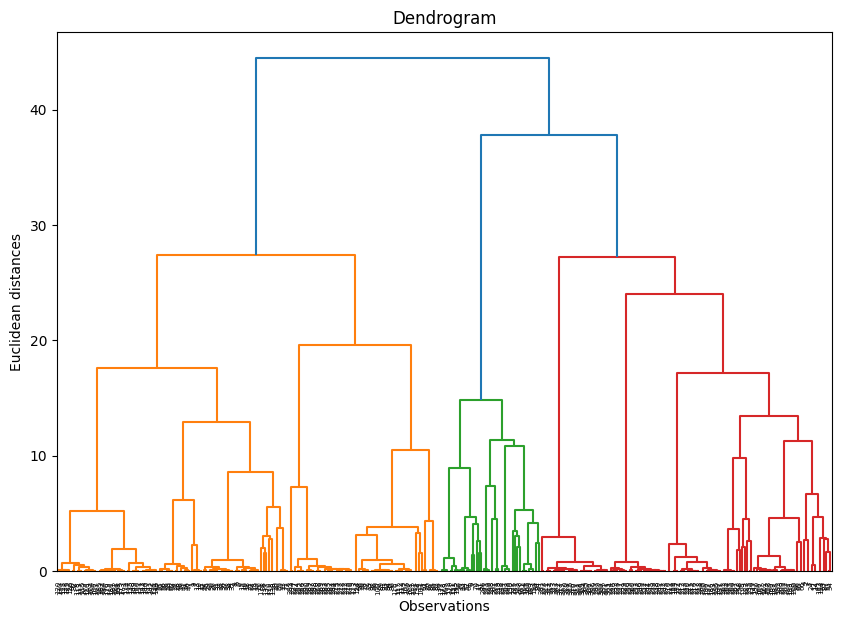

In [15]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Create the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distances')
plt.show()


### Fit the Hierarchical Clustering Model

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Fit the model
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_hc


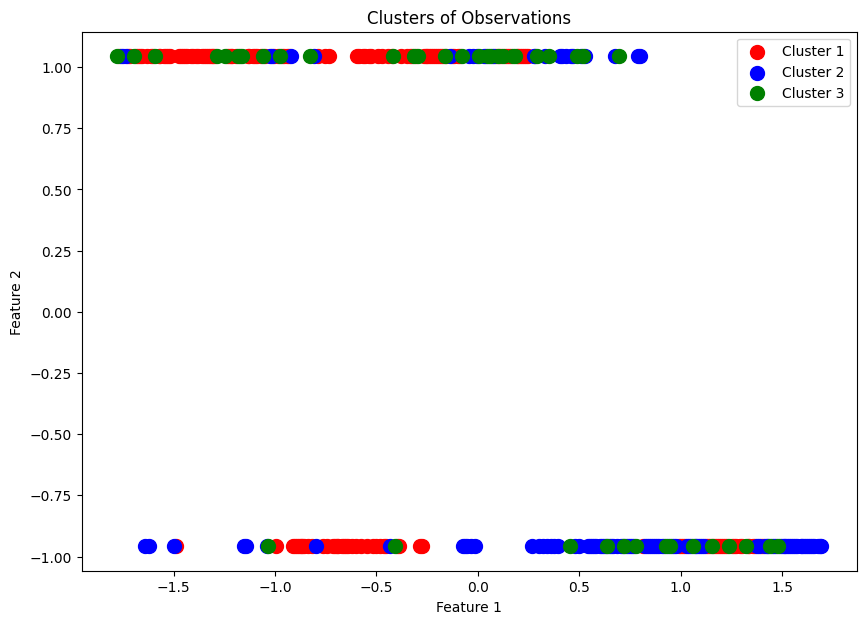

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# k means Clustering

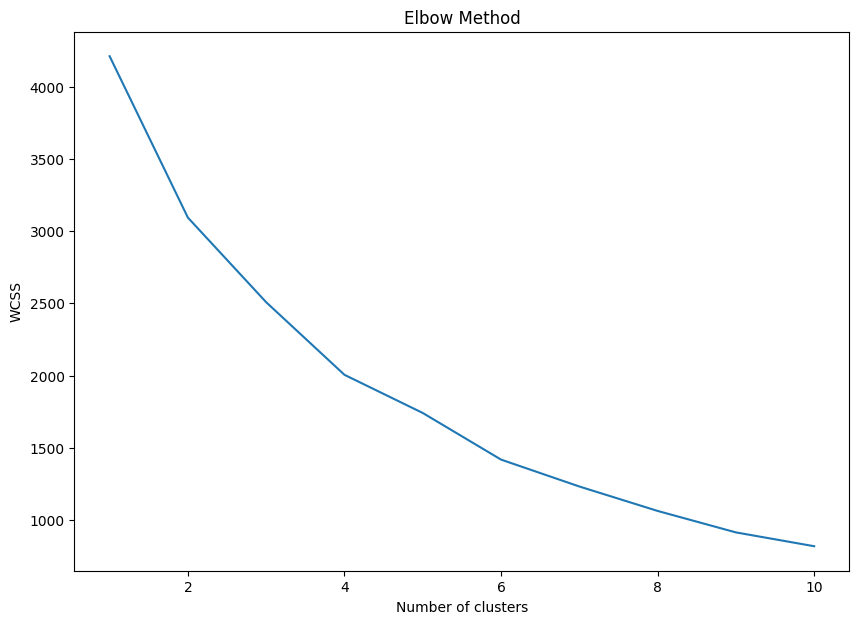

In [22]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['KMeans_Cluster'] = y_kmeans



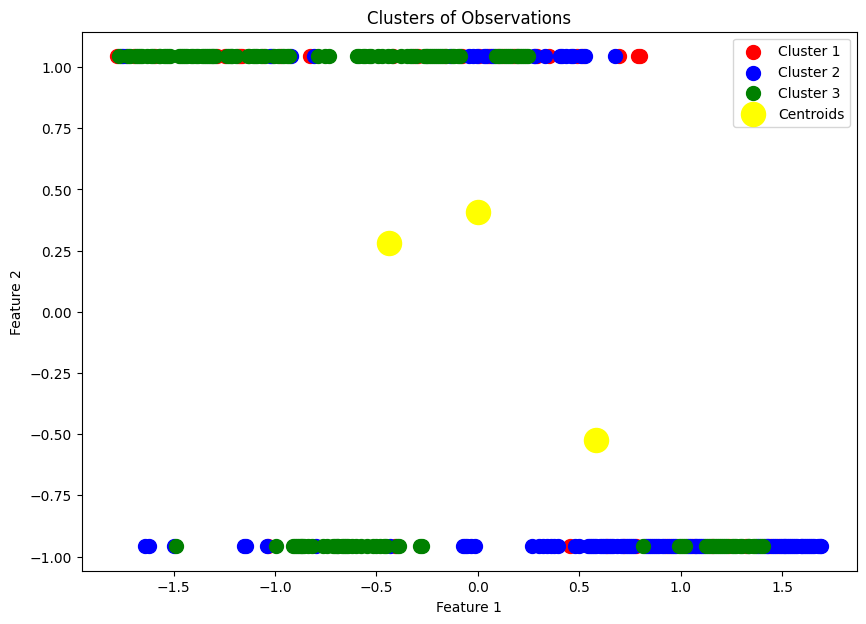

In [23]:

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Decision Tree Algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the dataset into training and testing sets
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
[[ 9  1  0]
 [ 1 36  3]
 [ 1  1 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.95      0.90      0.92        40
           2       0.81      0.87      0.84        15

    accuracy                           0.89        65
   macro avg       0.86      0.89      0.87        65
weighted avg       0.90      0.89      0.89        65


Accuracy: 0.8923076923076924


### visualize the trained Decision Tree model.

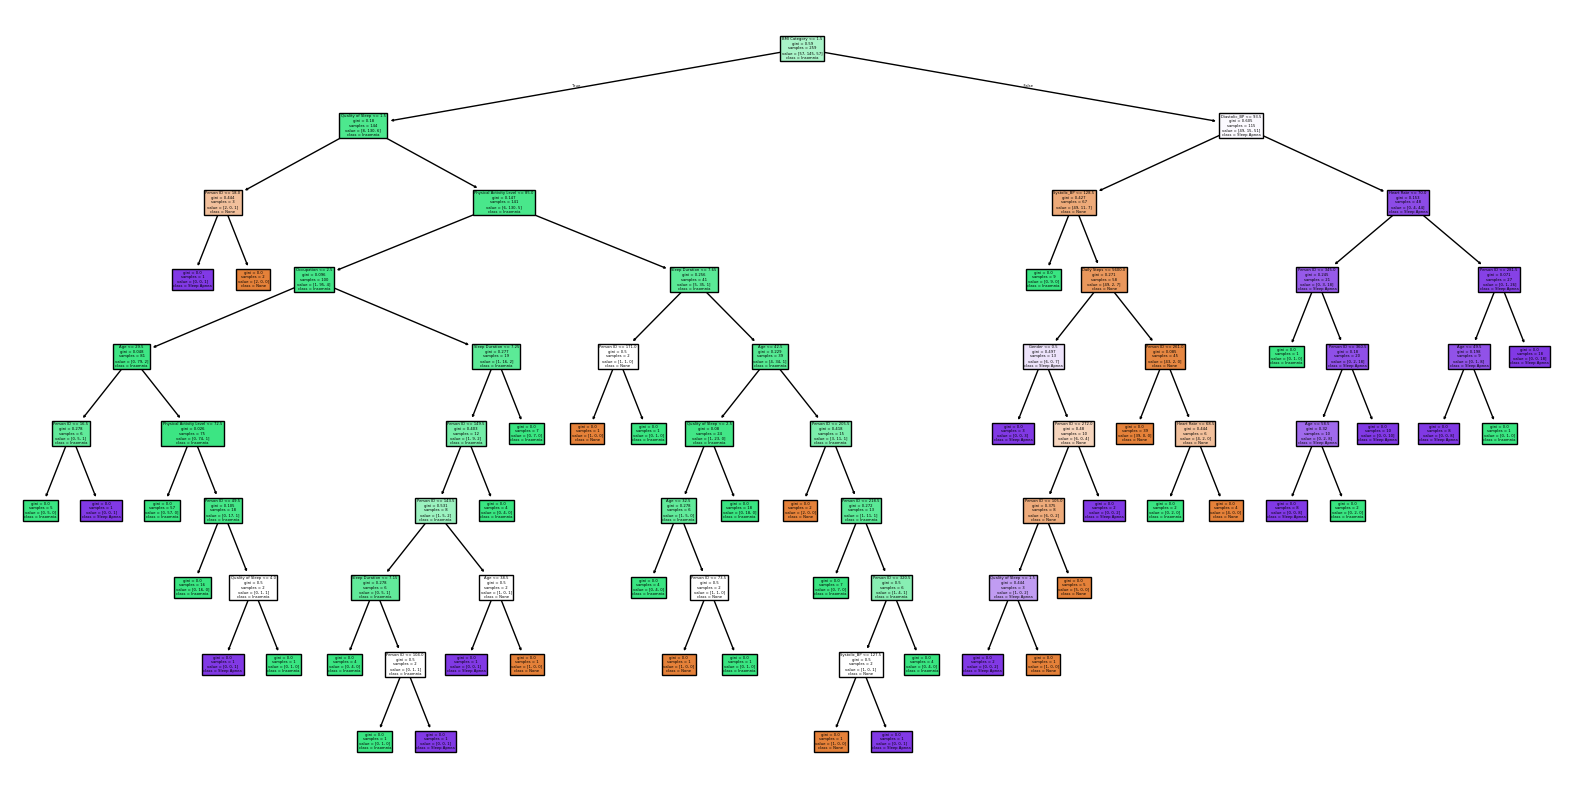

In [27]:
from sklearn import tree

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['None', 'Insomnia', 'Sleep Apnea'])
plt.show()


# Random Forest Algorithm

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))


Confusion Matrix:
[[ 9  1  0]
 [ 2 36  2]
 [ 3  0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.97      0.90      0.94        40
           2       0.86      0.80      0.83        15

    accuracy                           0.88        65
   macro avg       0.82      0.87      0.84        65
weighted avg       0.90      0.88      0.88        65


Accuracy: 0.8769230769230769


# Artificial Neural Networks

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN
ann_model = Sequential()

# Adding input layer and the first hidden layer
ann_model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
ann_model.add(Dense(units=16, activation='relu'))

# Adding the output layer
ann_model.add(Dense(units=3, activation='softmax'))

# Compiling the ANN
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, batch_size=10, epochs=100)

# Make predictions
y_pred_ann = ann_model.predict(X_test)
y_pred_ann_classes = y_pred_ann.argmax(axis=1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann_classes))
print("\nAccuracy:", accuracy_score(y_test, y_pred_ann_classes))


Epoch 1/100


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2358 - loss: 1329.1810   
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.5823 - loss: 208.0642
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.4079 - loss: 41.4459
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.3382 - loss: 16.3903
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.3712 - loss: 11.7801
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.3885 - loss: 15.3826
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.4709 - loss: 11.6225
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.4459 - loss: 8.0089
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.3922 - loss: 13.1852
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4743 - loss: 11.1209
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.4104 - loss: 8.2859
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 